rcp8.5 gwl_1_5
rcp8.5 gwl_2
rcp8.5 gwl_4
rcp2.6 gwl_4
rcp2.6 gwl_1_5
rcp2.6 gwl_2


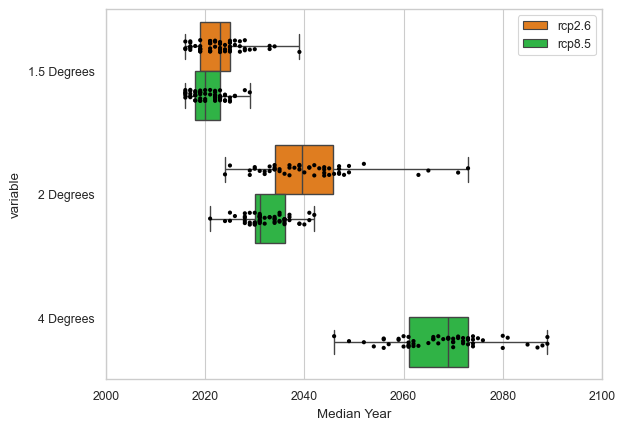

In [1]:
from ffdi_variables_analysis import get_ens_df, plot_gwl_year
import pandas as pd
import cftime
import iris

# Load the ensemble jobids and GWLs
ensdf = get_ens_df()
df = ensdf.copy()
plot_gwl_year(ensdf)

In [2]:
df

rcp   hist    fut  gwl_1_5_start  gwl_2_start  gwl_4_start
0    rcp2.6  akowa  akuka         2007.0       2019.0         <NA>
1    rcp2.6  akowb  akukb         2011.0       2037.0         <NA>
2    rcp2.6  akowc  akukc         2023.0       2037.0         <NA>
3    rcp2.6  akowe  akuke         2009.0       2023.0         <NA>
4    rcp2.6  akowf  akukf         2013.0       2035.0         <NA>
..      ...    ...    ...            ...          ...          ...
109  rcp8.5  akozl  aldsl         2013.0       2027.0       2062.0
110  rcp8.5  akozn  aldsn         2006.0       2021.0       2064.0
111  rcp8.5  akozo  aldso         2006.0       2020.0       2051.0
112  rcp8.5  akozp  aldsp         2006.0       2023.0       2062.0
113  rcp8.5  akozq  aldsq         2013.0       2024.0       2056.0

[114 rows x 6 columns]

To generate these files, I need to run the following shell script:

`/net/home/h02/hadhy/PycharmProjects/fire_paper/ffdi_variables_analysis.sh`

### Load the pre-processed data

Note that the data in these files is a 0.1% sample of all the grid cells for a given country that have either 12 <= FFDI < 24, or FFDI >= 24 

In many of the subsequent plots, we take a 10% (or 1%) sample of that, meaning that the plots are showing 0.01% (or 0.001%) of the full data

In [3]:
country_list = ['Australia', 'Brazil', 'United States of America']
# country_list = ['Australia', 'Brazil', 'South Africa', 'United States of America']
clen = len(country_list)

In [4]:
df_final1 = pd.read_csv(f'/data/users/hadhy/ESMS/fire_paper/data/odf_bigdata_{clen}countries_12_to_24.csv')
df_final2 = pd.read_csv(f'/data/users/hadhy/ESMS/fire_paper/data/odf_bigdata_{clen}countries_gt_24.csv')


In [5]:
df_final = pd.concat([df_final1, df_final2], ignore_index=True)

In [6]:
df_final.columns

Index(['0', 't', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'FFDI',
       'air_temperature', 'precipitation_in_mpersec', 'relative_humidity',
       'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr', 'names'],
      dtype='object')

In [7]:
df_final['ffdi_class'] = 0

class12_24 = (df_final.FFDI >= 12) & (df_final.FFDI < 24) 
df_final['ffdi_class'].loc[class12_24] = '12 <= FFDI < 24'

class_gt24 = (df_final.FFDI >= 24)
df_final['ffdi_class'].loc[class_gt24] = 'FFDI >= 24'

## Create some initial scatter plots

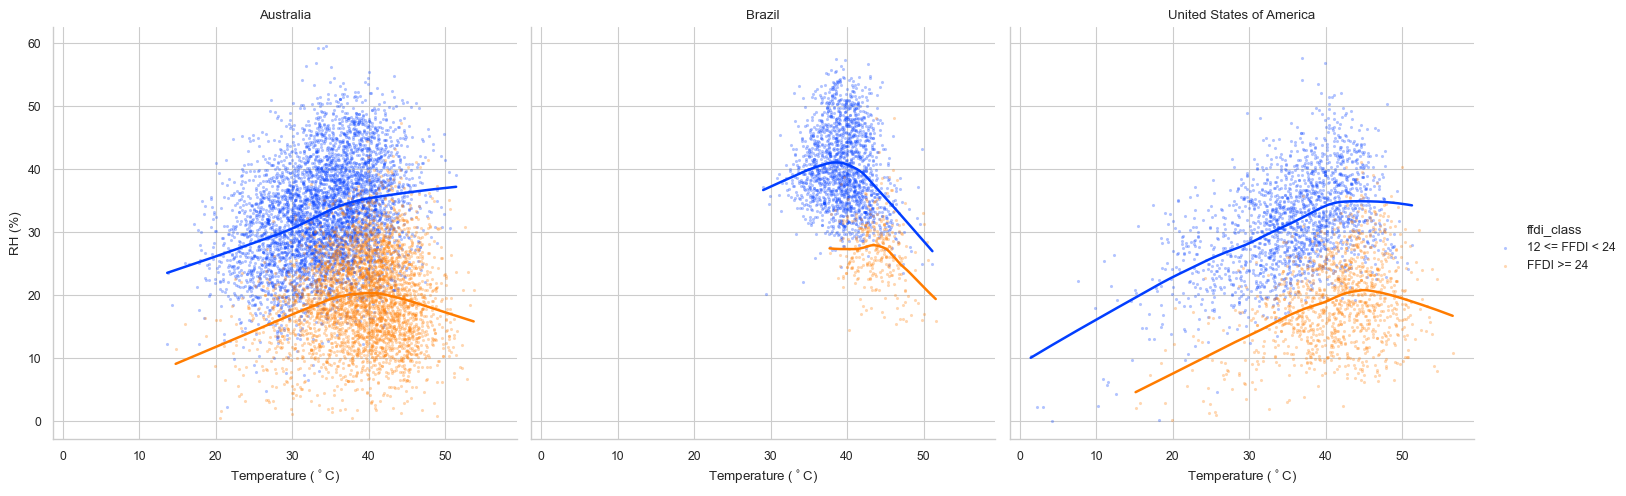

In [8]:
# vars = ['relative_humidity', 'soil_moisture_content_top_metre', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'air_temperature']
import seaborn as sns
import matplotlib.pyplot as plt

gwl_order = ['Baseline', 'GWL1.5', 'GWL2', 'GWL4']
country_order = country_list

# g = sns.lmplot(data=df_final_long.loc[(df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4')].sample(frac=0.05, replace=False), x='FFDI', y='value', hue='gwl', row='variable', row_order=var_order, col='names', col_order=country_order, hue_order=gwl_order, palette="bright", aspect=2.7, height=1.7, lowess=True, facet_kws={'sharex': True, 'sharey': False}, scatter_kws={'alpha':0.3, 'linewidths': 0, 's': 5})  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', hue='ffdi_class', hue='variable', 

# g.set_titles(row_template='{row_name}', col_template='{col_name}')  
# for i, ax in enumerate(g.axes[:, 0]):
#     ax.set_ylabel(var_units[i])


g = sns.lmplot(data=df_final.sample(frac=0.1, replace=False), 
               x='air_temperature', y='relative_humidity', hue='ffdi_class', col='names', 
               col_order=country_order, col_wrap=clen, palette="bright", lowess=True, 
               facet_kws={'sharex': True, 'sharey': True}, scatter_kws={'alpha':0.3, 'linewidths': 0, 's': 5})  # style='rcp', size='FFDI', sizes=(1,100), hue_order=gwl_order, 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="RH (%)")

plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-{clen}countries_ffdi-class.png')

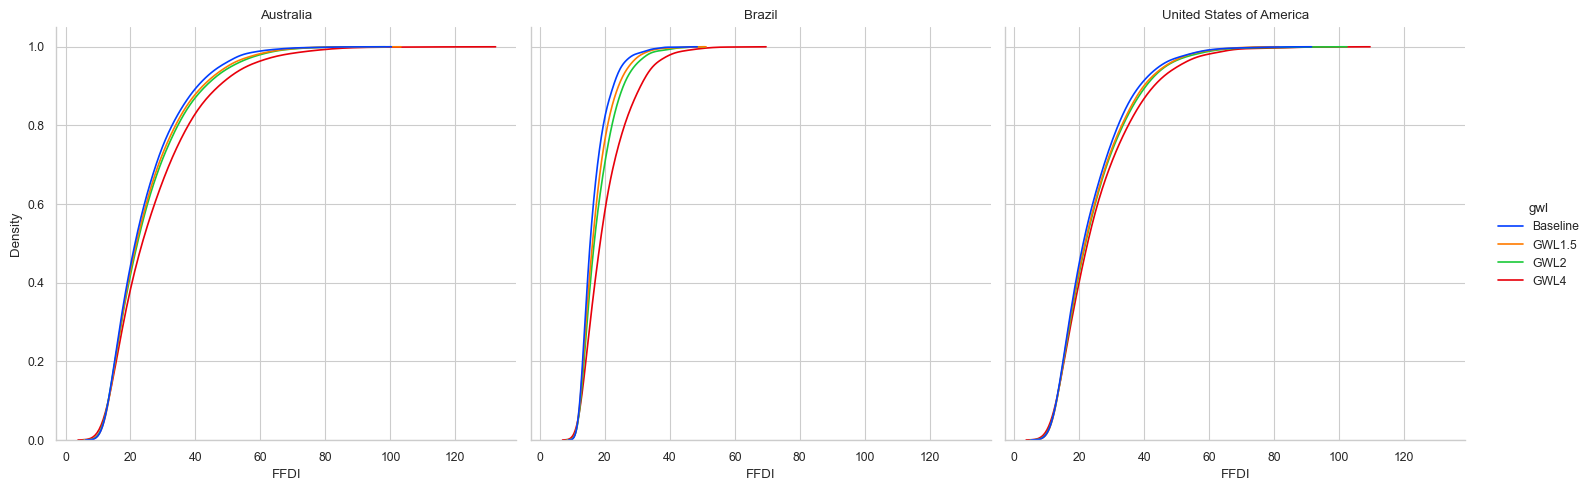

In [9]:
g = sns.displot(data=df_final.sample(frac=0.3, replace=False), 
                x="FFDI", hue="gwl", col='names', 
                col_order=country_order, hue_order=gwl_order, kind="kde", 
                log_scale=False, cumulative=True, common_norm=False, palette="bright")
g.set_titles(col_template='{col_name}')  
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-{clen}countries_ffdi-CDF.png')

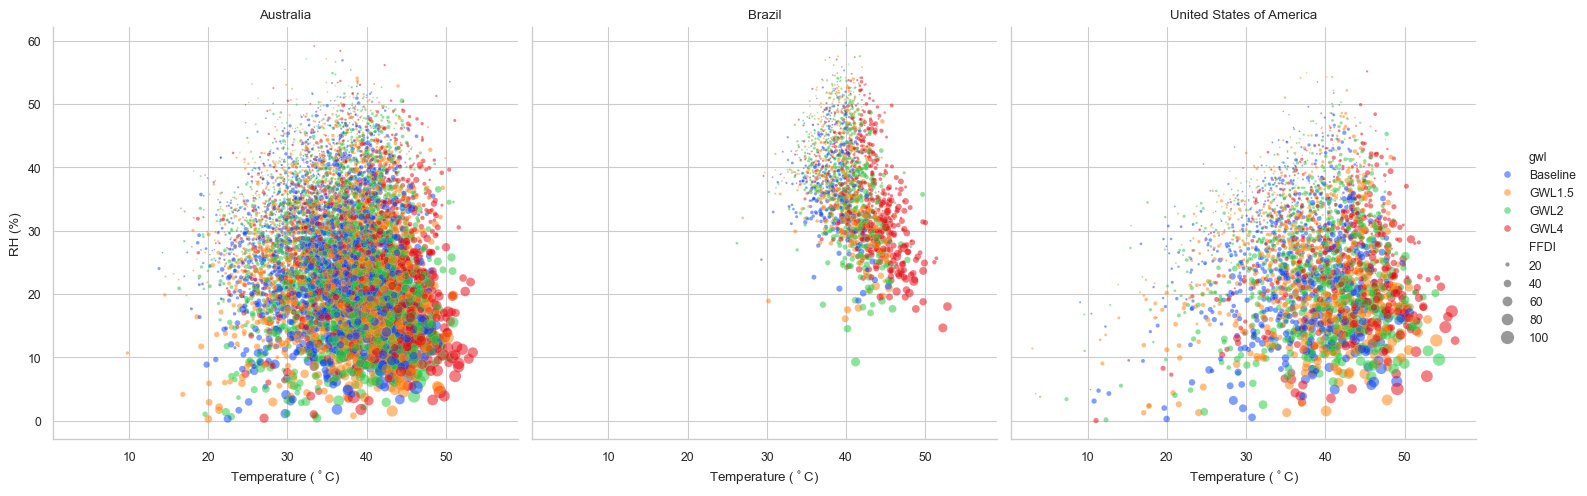

In [10]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), 
                x='air_temperature', y='relative_humidity', hue='gwl', size='FFDI', 
                sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, 
                col='names', col_order=country_order, col_wrap=clen, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="RH (%)")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-{clen}countries_temp-vs-rh.png')

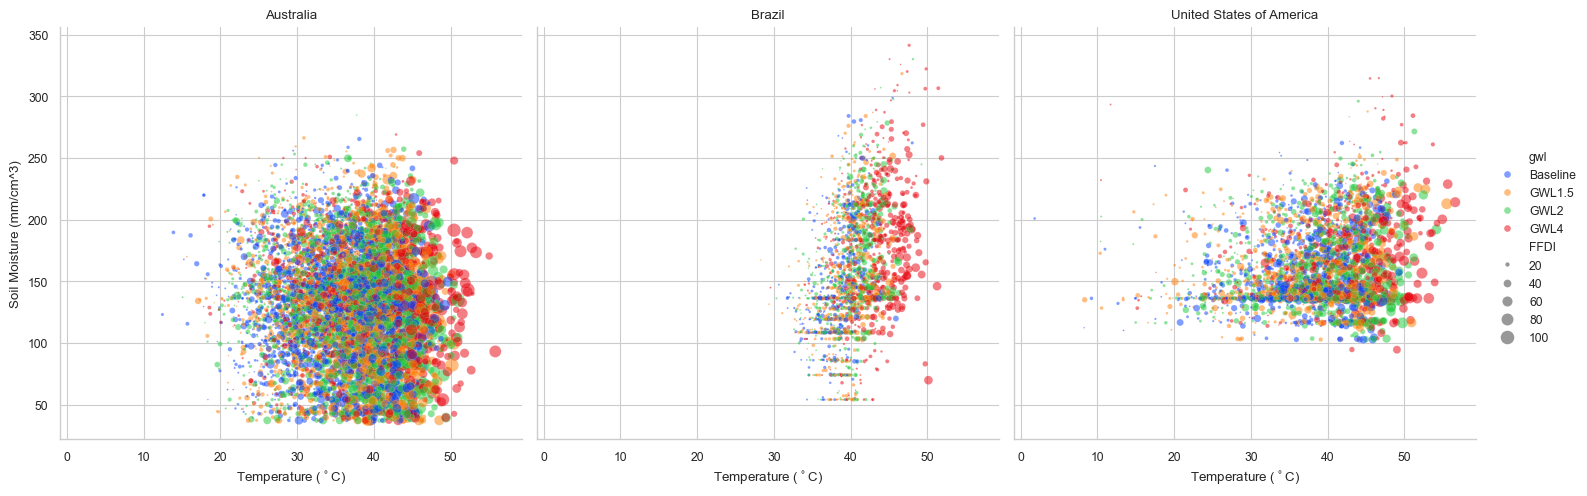

In [11]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), 
                x='air_temperature', y='soil_moisture_content_top_metre', hue='gwl', size='FFDI', 
                sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, 
                col='names', col_order=country_order, col_wrap=clen, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="Soil Moisture (mm/cm^3)")

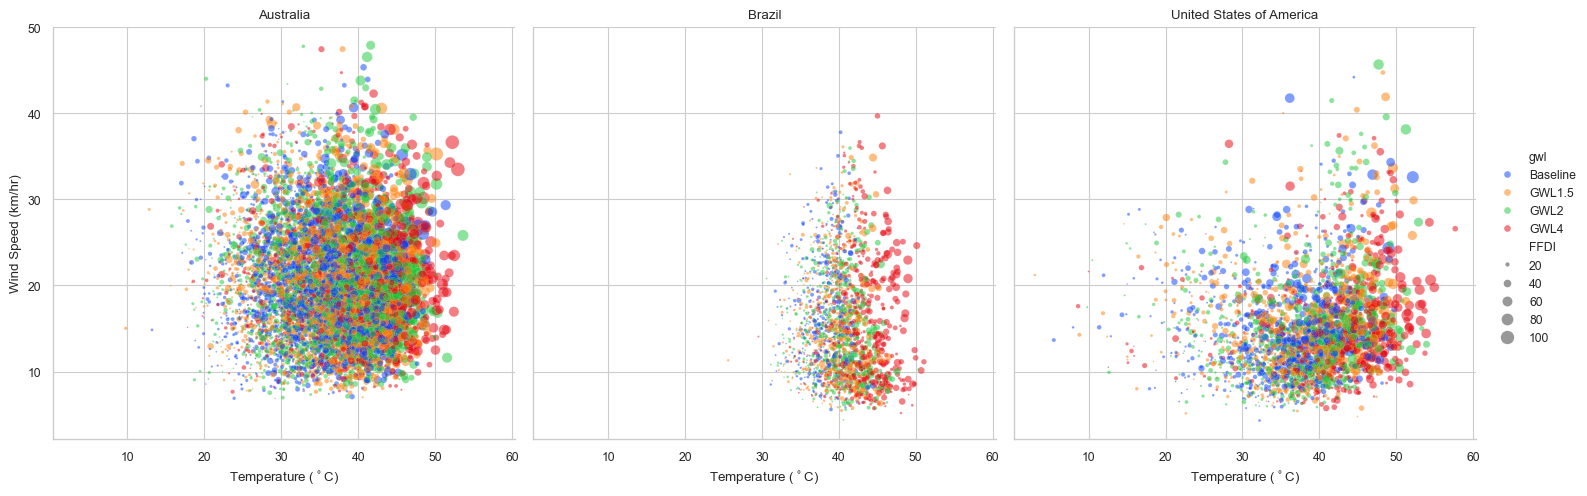

In [12]:
g = sns.relplot(data=df_final.sample(frac=0.1, replace=False), 
                x='air_temperature', y='windspeed_in_km_per_hr', hue='gwl', size='FFDI', 
                sizes=(1,100), alpha=.5, kind='scatter', hue_order=gwl_order, 
                col='names', col_wrap=clen, col_order=country_order, palette="bright")  # style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="Temperature ($^\circ$C)", y_var="Wind Speed (km/hr)") 

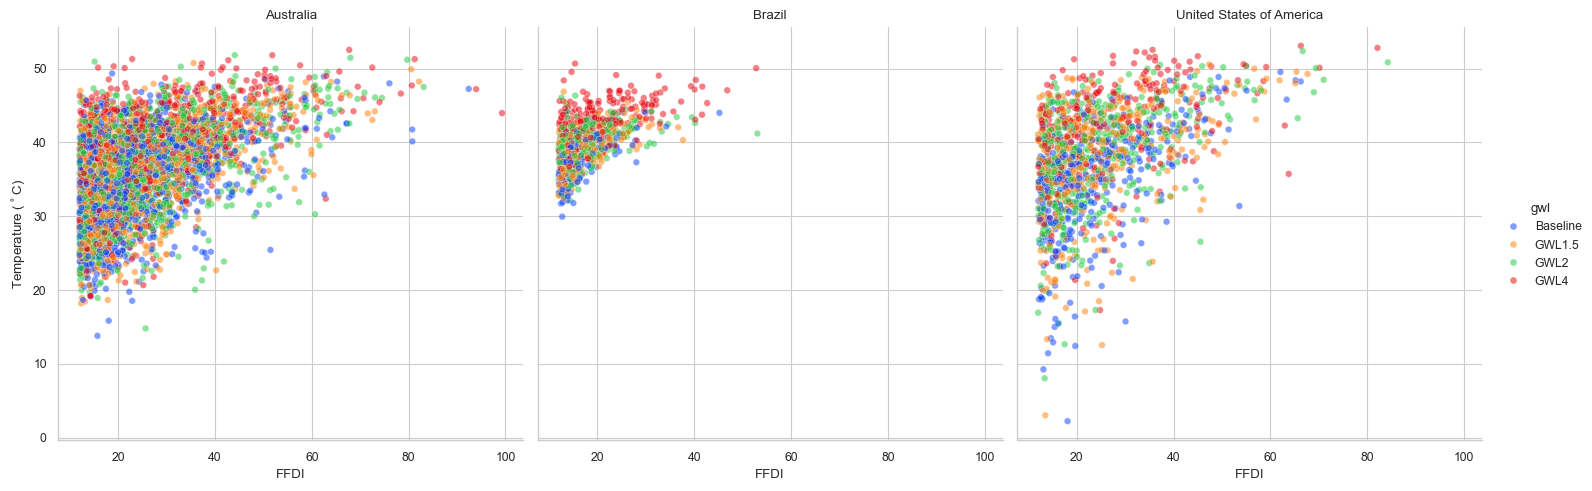

In [13]:
g = sns.relplot(data=df_final.sample(frac=0.05, replace=False), 
                x='FFDI', y='air_temperature', hue='gwl', alpha=.5, kind='scatter', 
                hue_order=gwl_order, col='names', col_wrap=clen, col_order=country_order, palette="bright")  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="FFDI", y_var="Temperature ($^\circ$C)")

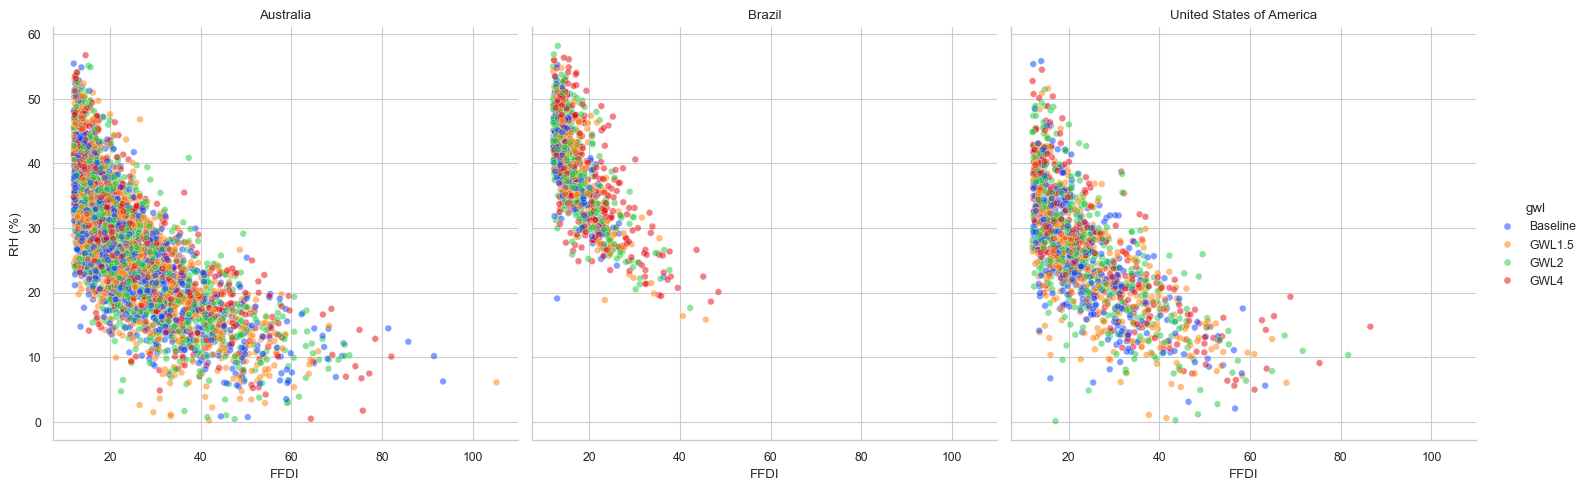

In [14]:
g = sns.relplot(data=df_final.sample(frac=0.05, replace=False), 
                x='FFDI', y='relative_humidity', hue='gwl', alpha=.5, kind='scatter', 
                hue_order=gwl_order, col='names', col_wrap=clen, col_order=country_order, palette="bright")  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', 
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(col_template='{col_name}')
g.set_axis_labels(x_var="FFDI", y_var="RH (%)")

## Melt and sample full dataset for subsequent use in assessment of variable importance

In [15]:
df_final_long = pd.melt(df_final.groupby(['ffdi_class', 'gwl', 'names'], group_keys=False).apply(lambda x: x.sample(frac=0.1)), 
                        id_vars=['t', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'names', 'FFDI', 'ffdi_class'], 
                        value_vars=['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr'])

In [16]:
df_final_long

t       x     y       gwl ensemble_member     rcp  \
0      1998-12-11 12:00:00  138.75 -17.5  Baseline           aldqg  rcp8.5   
1      1996-05-10 12:00:00  138.75 -22.5  Baseline           aldqm  rcp8.5   
2      1988-11-03 12:00:00  142.50 -17.5  Baseline           akukf  rcp2.6   
3      1998-04-25 12:00:00  142.50 -32.5  Baseline           aldqa  rcp8.5   
4      1995-04-07 12:00:00  127.50 -25.0  Baseline           akunp  rcp2.6   
...                    ...     ...   ...       ...             ...     ...   
64120  2070-09-15 12:00:00 -108.75  32.5      GWL4           aldri  rcp8.5   
64121  2073-07-20 12:00:00 -112.50  32.5      GWL4           aldqg  rcp8.5   
64122  2074-08-07 12:00:00 -123.75  45.0      GWL4           aldrn  rcp8.5   
64123  2056-01-25 12:00:00 -120.00  35.0      GWL4           aldqn  rcp8.5   
64124  2064-06-18 12:00:00  -97.50  40.0      GWL4           aldsc  rcp8.5   

                          names       FFDI       ffdi_class  \
0                     Australia  19.843254  12 <= FFDI < 24   
1                     Australia  15.171199  12 <= FFDI < 24   
2                     Australia  19.163253  12 <= FFDI < 24   
3                     Australia  12.099304  12 <= FFDI < 24   
4                     Australia  17.468834  12 <= FFDI < 24   
...                         ...        ...              ...   
64120  United States of America  25.099257       FFDI >= 24   
64121  United States of America  31.873111       FFDI >= 24   
64122  United States of America  52.174187       FFDI >= 24   
64123  United States of America  37.910355       FFDI >= 24   
64124  United States of America  30.549654       FFDI >= 24   

                     variable      value  
0             air_temperature  43.147789  
1             air_temperature  35.767693  
2             air_temperature  40.874290  
3             air_temperature  29.906702  
4             air_temperature  25.333643  
...                       ...        ...  
64120  windspeed_in_km_per_hr  11.464054  
64121  windspeed_in_km_per_hr  11.456236  
64122  windspeed_in_km_per_hr  18.667636  
64123  windspeed_in_km_per_hr  12.167186  
64124  windspeed_in_km_per_hr  22.838529  

[64125 rows x 11 columns]

In [17]:
df_final_long.loc[df_final_long.variable == 'air_temperature', 'variable'] = '2m Air Temperature'
df_final_long.loc[df_final_long.variable == 'precipitation_in_mpersec', 'variable'] = 'Precipitation'
df_final_long.loc[df_final_long.variable == 'relative_humidity', 'variable'] = 'Relative Humidity'
df_final_long.loc[df_final_long.variable == 'soil_moisture_content_top_metre', 'variable'] = 'Soil Moisture'
df_final_long.loc[df_final_long.variable == 'windspeed_in_km_per_hr', 'variable'] = 'Wind Speed'

In [18]:
pd.unique(df_final_long.variable)

array(['2m Air Temperature', 'Precipitation', 'Relative Humidity',
       'Soil Moisture', 'Wind Speed'], dtype=object)

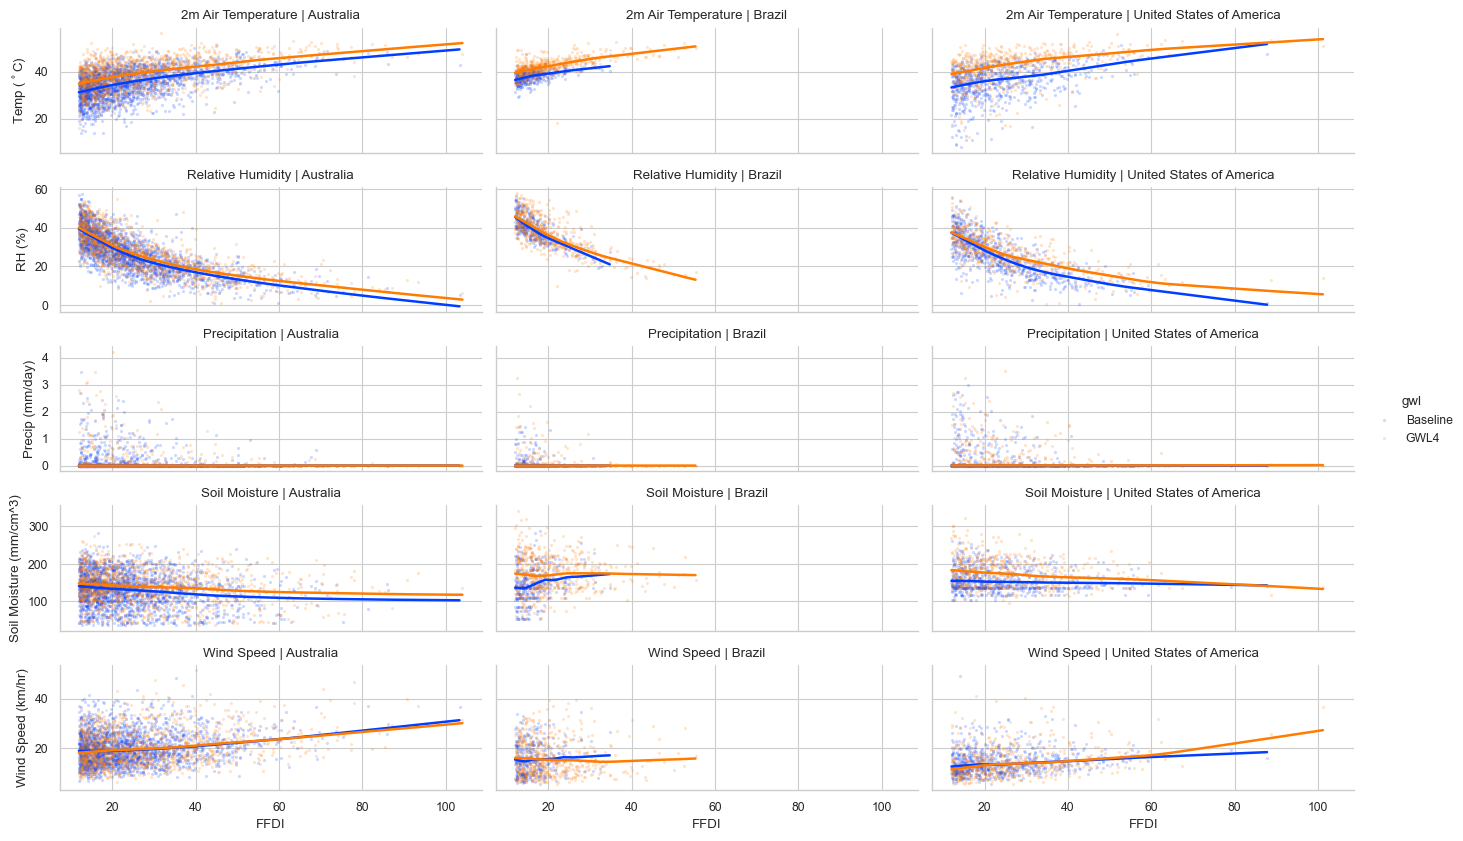

In [19]:
var_order = ['2m Air Temperature', 'Relative Humidity', 'Precipitation', 'Soil Moisture', 'Wind Speed']
var_units = ["Temp ($^\circ$C)", "RH (%)", "Precip (mm/day)", "Soil Moisture (mm/cm^3)", "Wind Speed (km/hr)"]
gwl_order = ['Baseline', 'GWL4']

# plt.figure(figsize=(12, 5))

g = sns.lmplot(data=df_final_long.loc[(df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4')], 
               x='FFDI', y='value', hue='gwl', row='variable', row_order=var_order, 
               col='names', col_order=country_order, hue_order=gwl_order, 
               palette="bright", aspect=2.7, height=1.7, lowess=True, 
               facet_kws={'sharex': True, 'sharey': 'row'}, scatter_kws={'alpha':0.2, 'linewidths': 0, 's': 5})  # size='soil_moisture_content_top_metre', sizes=(1,100), style='rcp', hue='ffdi_class', hue='variable', 

g.set_titles(row_template='{row_name}', col_template='{col_name}')  
for i, ax in enumerate(g.axes[:, 0]):
    ax.set_ylabel(var_units[i])

plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-{clen}countries_baseline-4C.png')

In [20]:
df_final.columns

Index(['0', 't', 'x', 'y', 'gwl', 'ensemble_member', 'rcp', 'FFDI',
       'air_temperature', 'precipitation_in_mpersec', 'relative_humidity',
       'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr', 'names',
       'ffdi_class'],
      dtype='object')

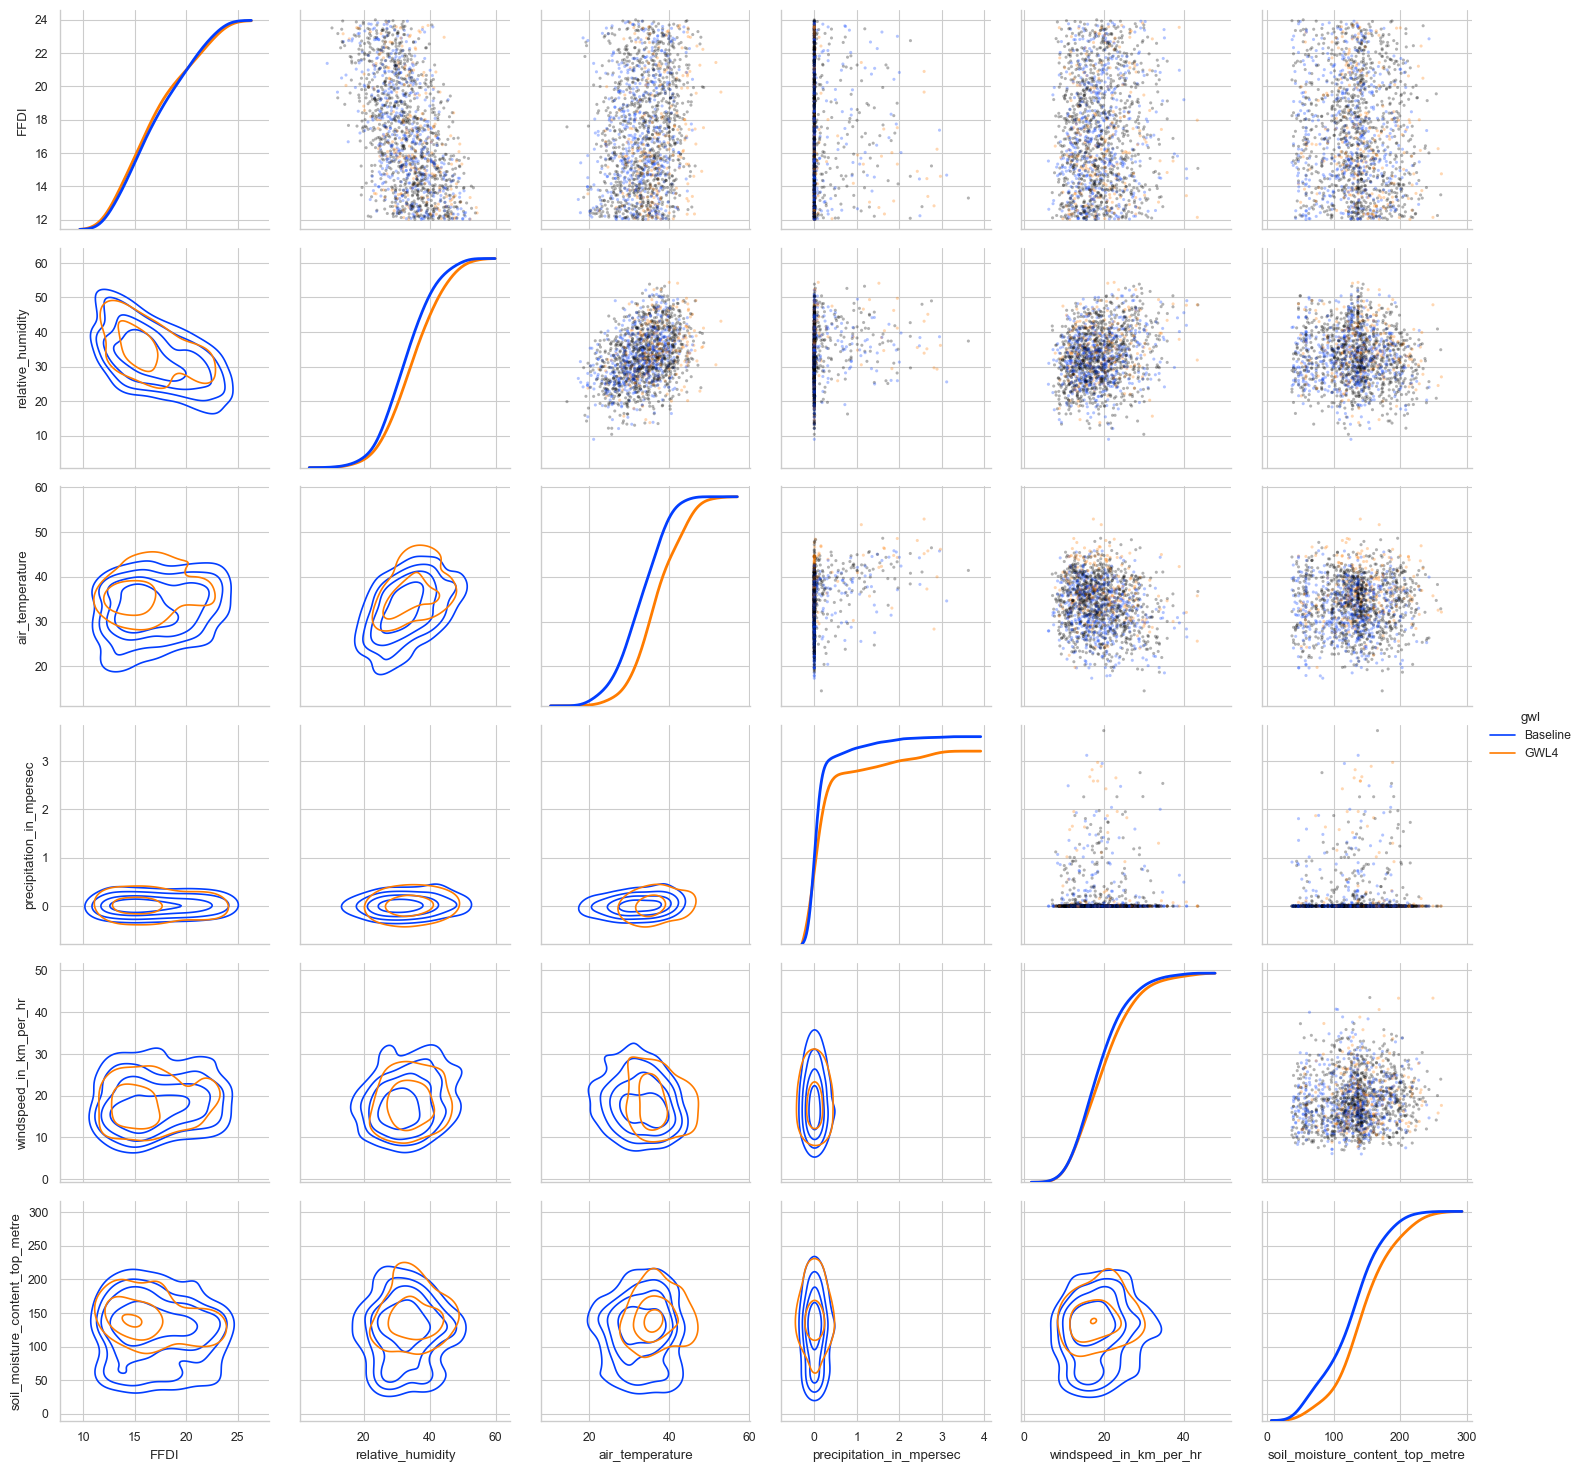

In [21]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['Australia']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.1, replace=False), 
                 vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], 
                 hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
# g.map_diag(sns.histplot, multiple='stack')
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia-pairsplot_baseline-vs-4C.png')

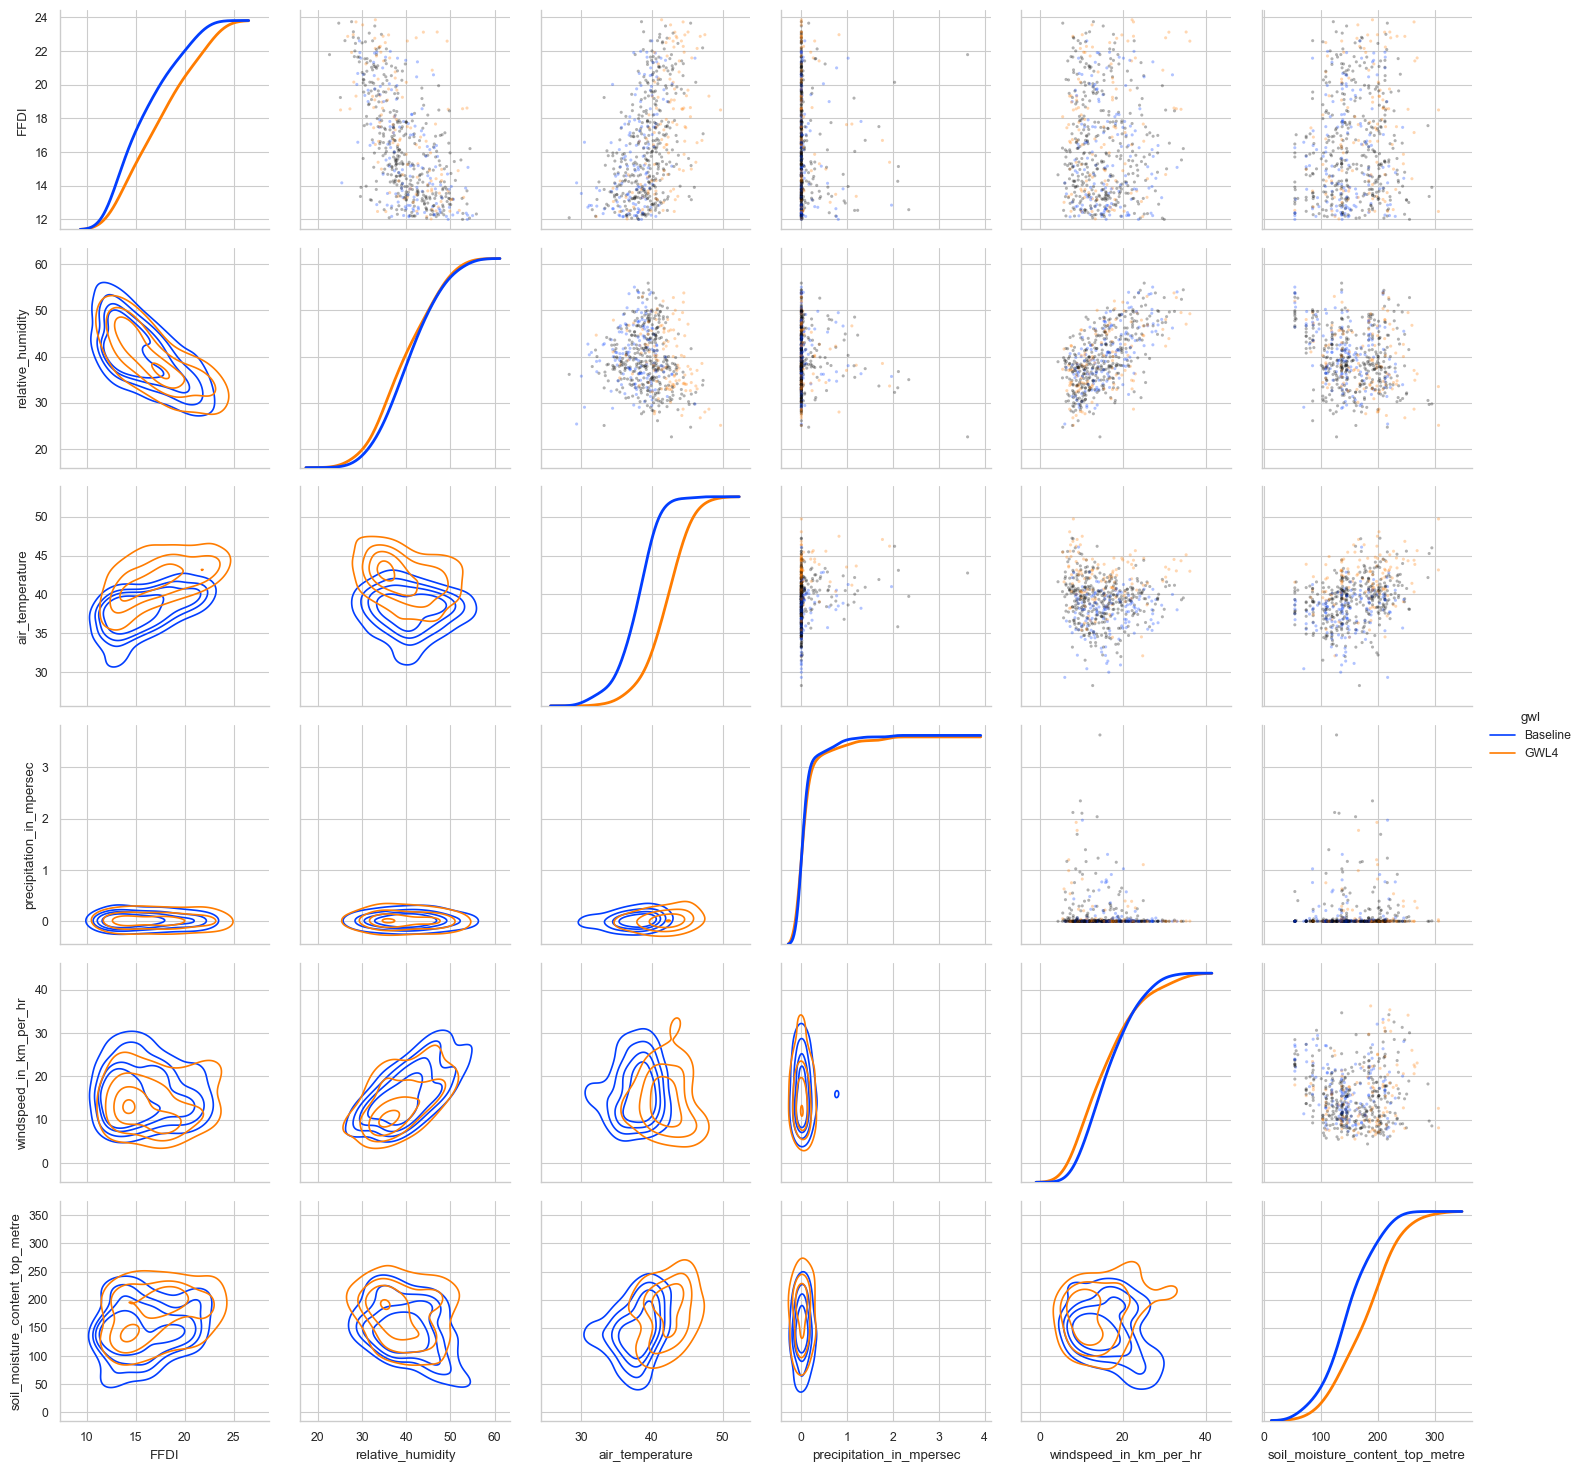

In [22]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['Brazil']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.1, replace=False), 
                 vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], 
                 hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Brazil-pairsplot_baseline-vs-4C.png')

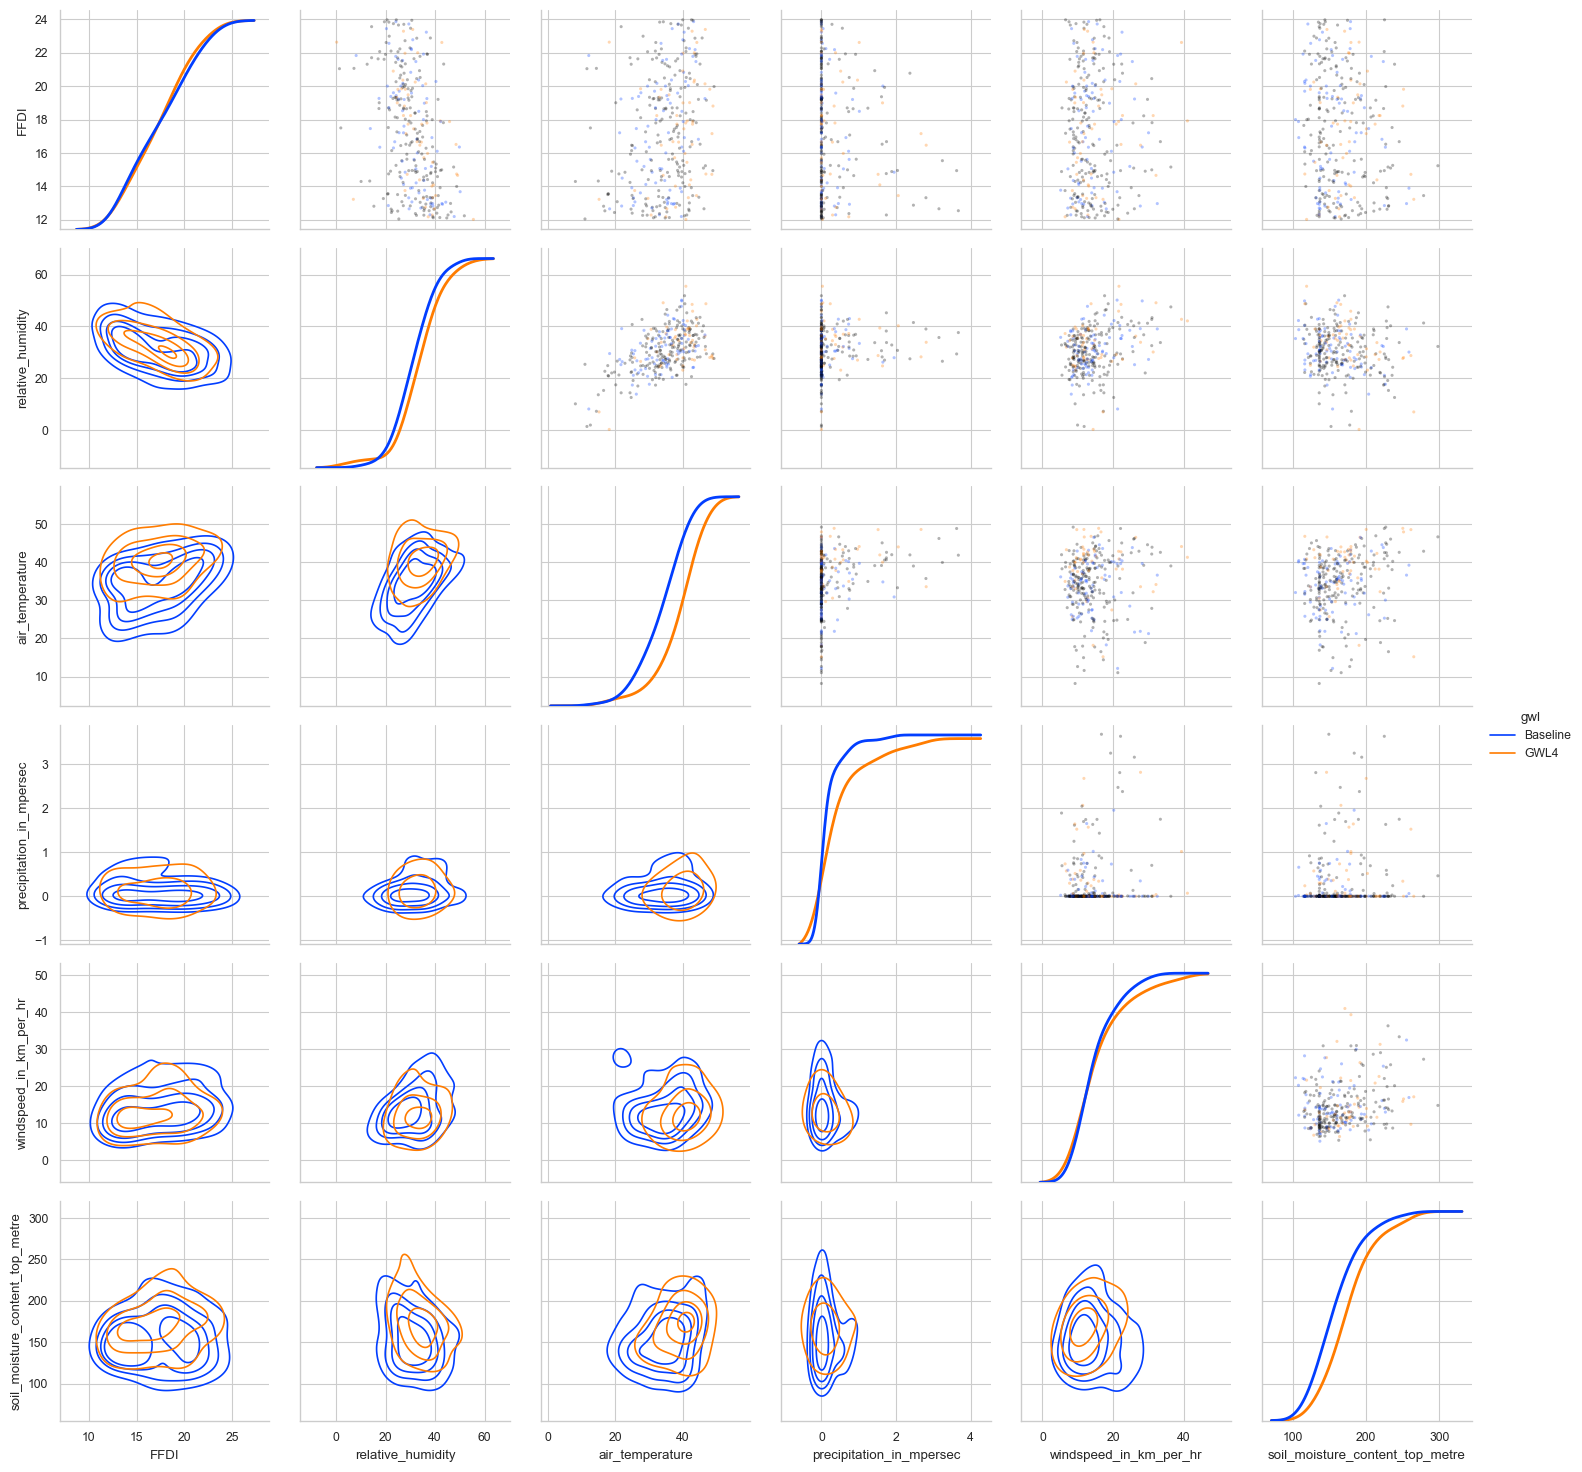

In [23]:
g = sns.PairGrid(data=df_final[df_final.names.isin(['United States of America']) & ((df_final_long.gwl == 'Baseline') | (df_final_long.gwl == 'GWL4'))].sample(frac=0.05, replace=False), 
                 vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], 
                 hue='gwl', palette="bright", hue_order=gwl_order)  # 'Australia', 'Brazil', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-USA-pairsplot_baseline-vs-4C.png')

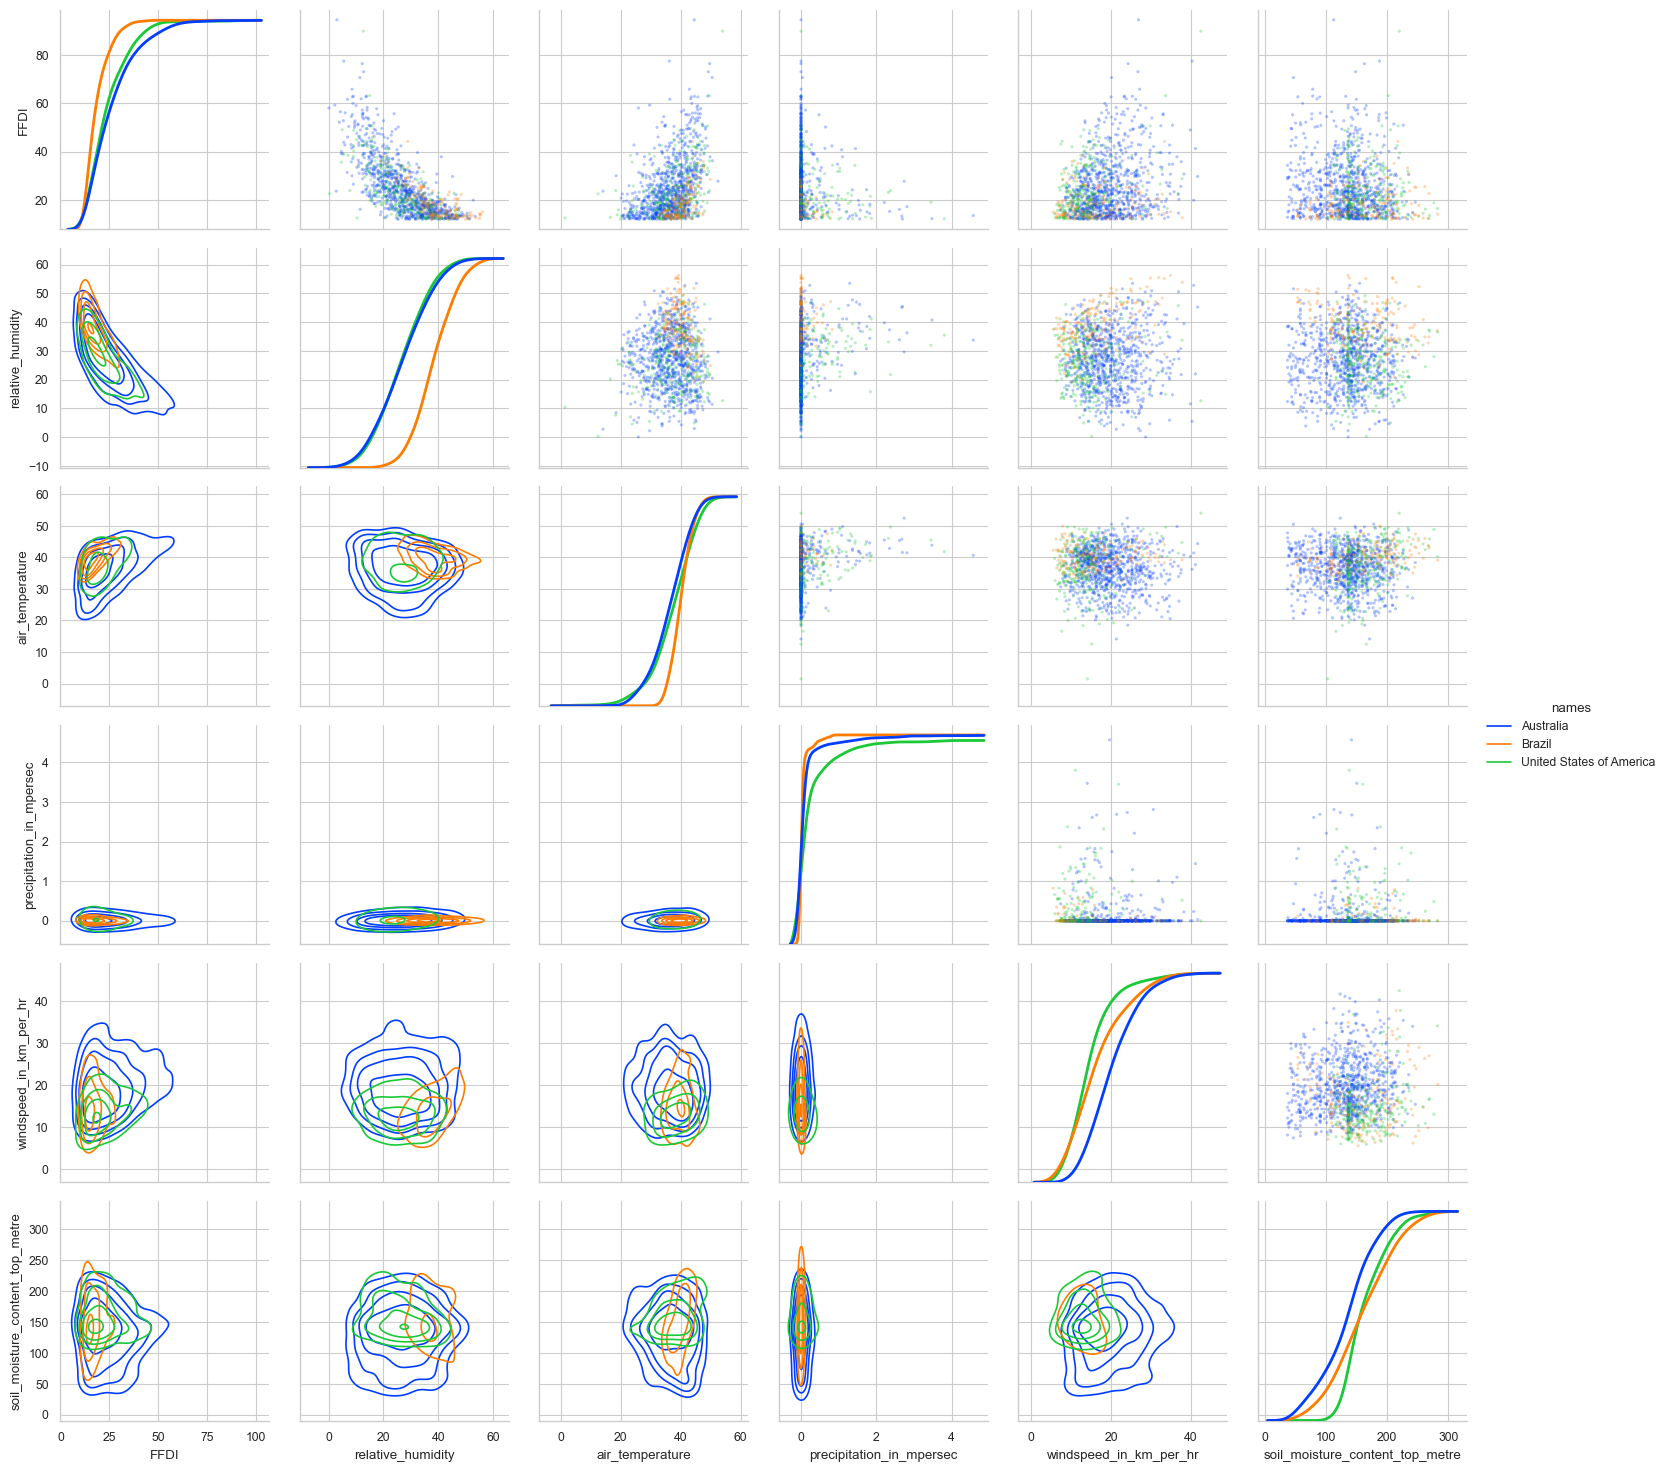

In [24]:
g = sns.PairGrid(data=df_final.sample(frac=0.01, replace=False), 
                 vars=['FFDI', 'relative_humidity', 'air_temperature', 'precipitation_in_mpersec', 'windspeed_in_km_per_hr', 'soil_moisture_content_top_metre'], 
                 hue='names', hue_order=country_order, palette="bright")  # 'Australia', 'Brazil', 'United States of America'
g.map_upper(sns.scatterplot, alpha=0.3, linewidths=0, s=5)
g.map_lower(sns.kdeplot, levels=5, thresh=.2)
g.map_diag(sns.kdeplot, lw=2, cumulative=True, common_norm=False, common_grid=True)
g.add_legend()
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-{clen}countries_pairs-plot.png')

## Use random forest to assess variable importance

Taken from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

### Work through an example with Australia

In [26]:
mysample = df_final[df_final.names.isin(['Australia'])].sample(frac=0.1, replace=False)
mysample['ffdi_class_int'] = 0
mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1

In [27]:
feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
X_features = mysample[feature_names]
y_classes = mysample[['FFDI']].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, stratify=mysample['ffdi_class_int'], random_state=42)

In [28]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)


Elapsed time to compute the importances: 53.537 seconds


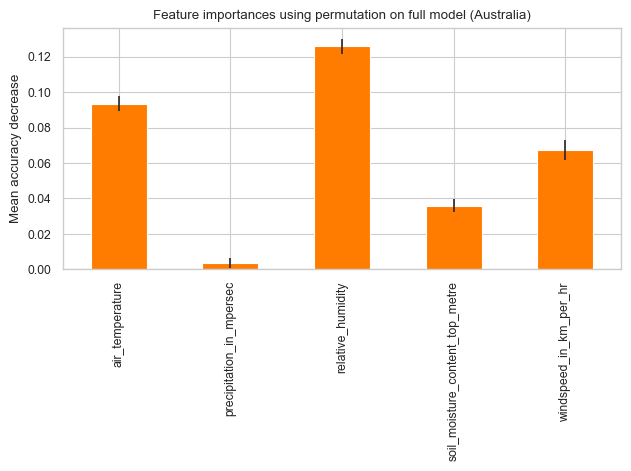

<Figure size 640x480 with 0 Axes>

In [30]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model (Australia)")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
plt.savefig('/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers-Australia_variable_importance.png')

### Run the same code for all 4 countries

In [31]:
output = []
countries = ['Australia', 'Brazil', 'United States of America']  # 'South Africa', 

# for ffdi_class in ['12 <= FFDI < 24', 'FFDI >= 24']:
for country in countries:
    # Subset the big dataframe
    mysample = df_final[df_final.names.isin([country])].sample(frac=0.1, replace=False)
    # mysample = df_final[(df_final.names.isin([country])) & (df_final.ffdi_class.isin([ffdi_class]))].sample(frac=0.1, replace=False)
    mysample['ffdi_class_int'] = 0
    mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1

    # Extract training and test data
    feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
    X_features = mysample[feature_names]
    y_classes = mysample[['FFDI']].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, stratify=mysample['ffdi_class_int'], random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, random_state=42)

    # Run the RF classifier
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train, y_train)

    # Get the variable importance using the test data
    result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    # Add into a DataFrame
    if isinstance(output, list):
        output = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country})
    else:
        newoutput = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country})
        output = pd.concat([output, newoutput])
    
# Now convert the index into a column
output = output.reset_index(inplace=False).rename(columns={'index': 'Variable'})
# Make columns categorical to help with plotting
output['Variable'] = pd.Categorical(output['Variable'], output['Variable'].unique())
output['country'] = pd.Categorical(output['country'], output['country'].unique())
# Make variable names nicer for plotting
lookup = {'air_temperature': 'T', 'precipitation_in_mpersec': 'Pr', 'relative_humidity': 'RH', 'soil_moisture_content_top_metre': 'SM', 'windspeed_in_km_per_hr': 'W'}
output['Variable_nice'] = 'T'
for k, v in lookup.items():
    output['Variable_nice'].loc[output['Variable'] == k] = v

output

Variable  importances  importances_std  \
0                   air_temperature     0.093008         0.004936   
1          precipitation_in_mpersec     0.003471         0.003510   
2                 relative_humidity     0.116650         0.004271   
3   soil_moisture_content_top_metre     0.033451         0.002587   
4            windspeed_in_km_per_hr     0.062425         0.005975   
5                   air_temperature     0.178788         0.010851   
6          precipitation_in_mpersec     0.015152         0.010623   
7                 relative_humidity     0.249697         0.013467   
8   soil_moisture_content_top_metre     0.039798         0.010918   
9            windspeed_in_km_per_hr     0.136970         0.010489   
10                  air_temperature     0.120028         0.011431   
11         precipitation_in_mpersec     0.007044         0.009046   
12                relative_humidity     0.140608         0.007251   
13  soil_moisture_content_top_metre     0.048895         0.008106   
14           windspeed_in_km_per_hr     0.050552         0.008934   

                     country Variable_nice  
0                  Australia             T  
1                  Australia            Pr  
2                  Australia            RH  
3                  Australia            SM  
4                  Australia             W  
5                     Brazil             T  
6                     Brazil            Pr  
7                     Brazil            RH  
8                     Brazil            SM  
9                     Brazil             W  
10  United States of America             T  
11  United States of America            Pr  
12  United States of America            RH  
13  United States of America            SM  
14  United States of America             W

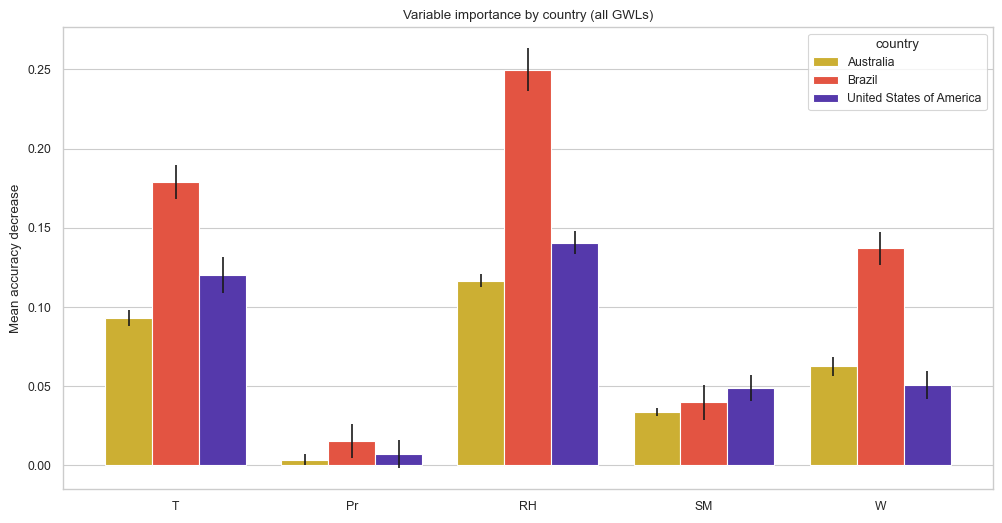

In [32]:
n = len(countries)

fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output, x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-n], y=y_coords[:-n], yerr=output["importances_std"], fmt="none", c="k")

ax.set_title("Variable importance by country (all GWLs)")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance_{clen}countries_allGWLs-Stratification.png')

### Is there a difference in variable importance if we run it on Baseline and 4C separately?

In [33]:
output = []
countries = ['Australia', 'Brazil', 'United States of America']  # 'South Africa', 

# for ffdi_class in ['12 <= FFDI < 24', 'FFDI >= 24']:
for gwl in ['Baseline', "GWL4"]:
    for country in countries:
        # Subset the big dataframe
        # mysample = df_final[df_final.names.isin([country])].sample(frac=0.1, replace=False)
        mysample = df_final[(df_final.names.isin([country])) & (df_final.gwl.isin([gwl]))].sample(frac=0.1, replace=False)
        mysample['ffdi_class_int'] = 0
        mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1
    
        # Extract training and test data
        feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
        X_features = mysample[feature_names]
        y_classes = mysample[['FFDI']].astype(int)
        X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, stratify=mysample['ffdi_class_int'], random_state=42)
    
        # Run the RF classifier
        forest = RandomForestClassifier(random_state=0)
        forest.fit(X_train, y_train)
    
        # Get the variable importance using the test data
        result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
        forest_importances = pd.Series(result.importances_mean, index=feature_names)
    
        # Add into a DataFrame
        if isinstance(output, list):
            output = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country, 'gwl': gwl})
        else:
            newoutput = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country, 'gwl': gwl})
            output = pd.concat([output, newoutput])
    
# Now convert the index into a column
output = output.reset_index(inplace=False).rename(columns={'index': 'Variable'})
# Make columns categorical to help with plotting
output['Variable'] = pd.Categorical(output['Variable'], output['Variable'].unique())
output['country'] = pd.Categorical(output['country'], output['country'].unique())
output['gwl'] = pd.Categorical(output['gwl'], output['gwl'].unique())
# Make variable names nicer for plotting
lookup = {'air_temperature': 'T', 'precipitation_in_mpersec': 'Pr', 'relative_humidity': 'RH', 'soil_moisture_content_top_metre': 'SM', 'windspeed_in_km_per_hr': 'W'}
output['Variable_nice'] = 'T'
for k, v in lookup.items():
    output['Variable_nice'].loc[output['Variable'] == k] = v

output

Variable  importances  importances_std  \
0                   air_temperature     0.078090         0.010889   
1          precipitation_in_mpersec     0.011423         0.006007   
2                 relative_humidity     0.124157         0.007678   
3   soil_moisture_content_top_metre     0.022097         0.011719   
4            windspeed_in_km_per_hr     0.045880         0.010535   
5                   air_temperature     0.110870         0.025165   
6          precipitation_in_mpersec     0.011957         0.012345   
7                 relative_humidity     0.166304         0.032987   
8   soil_moisture_content_top_metre     0.002174         0.025630   
9            windspeed_in_km_per_hr     0.075000         0.030916   
10                  air_temperature     0.039326         0.012811   
11         precipitation_in_mpersec    -0.010674         0.009214   
12                relative_humidity     0.066854         0.017307   
13  soil_moisture_content_top_metre    -0.005618         0.008703   
14           windspeed_in_km_per_hr     0.014045         0.021503   
15                  air_temperature     0.021341         0.013219   
16         precipitation_in_mpersec    -0.004573         0.006136   
17                relative_humidity     0.059146         0.011424   
18  soil_moisture_content_top_metre     0.004268         0.012949   
19           windspeed_in_km_per_hr     0.007012         0.011890   
20                  air_temperature     0.079104         0.019230   
21         precipitation_in_mpersec    -0.005970         0.014471   
22                relative_humidity     0.131343         0.018341   
23  soil_moisture_content_top_metre     0.017910         0.022929   
24           windspeed_in_km_per_hr     0.065672         0.018219   
25                  air_temperature     0.021583         0.013650   
26         precipitation_in_mpersec     0.002158         0.011623   
27                relative_humidity     0.050360         0.013650   
28  soil_moisture_content_top_metre     0.025180         0.012145   
29           windspeed_in_km_per_hr    -0.006475         0.010401   

                     country       gwl Variable_nice  
0                  Australia  Baseline             T  
1                  Australia  Baseline            Pr  
2                  Australia  Baseline            RH  
3                  Australia  Baseline            SM  
4                  Australia  Baseline             W  
5                     Brazil  Baseline             T  
6                     Brazil  Baseline            Pr  
7                     Brazil  Baseline            RH  
8                     Brazil  Baseline            SM  
9                     Brazil  Baseline             W  
10  United States of America  Baseline             T  
11  United States of America  Baseline            Pr  
12  United States of America  Baseline            RH  
13  United States of America  Baseline            SM  
14  United States of America  Baseline             W  
15                 Australia      GWL4             T  
16                 Australia      GWL4            Pr  
17                 Australia      GWL4            RH  
18                 Australia      GWL4            SM  
19                 Australia      GWL4             W  
20                    Brazil      GWL4             T  
21                    Brazil      GWL4            Pr  
22                    Brazil      GWL4            RH  
23                    Brazil      GWL4            SM  
24                    Brazil      GWL4             W  
25  United States of America      GWL4             T  
26  United States of America      GWL4            Pr  
27  United States of America      GWL4            RH  
28  United States of America      GWL4            SM  
29  United States of America      GWL4             W

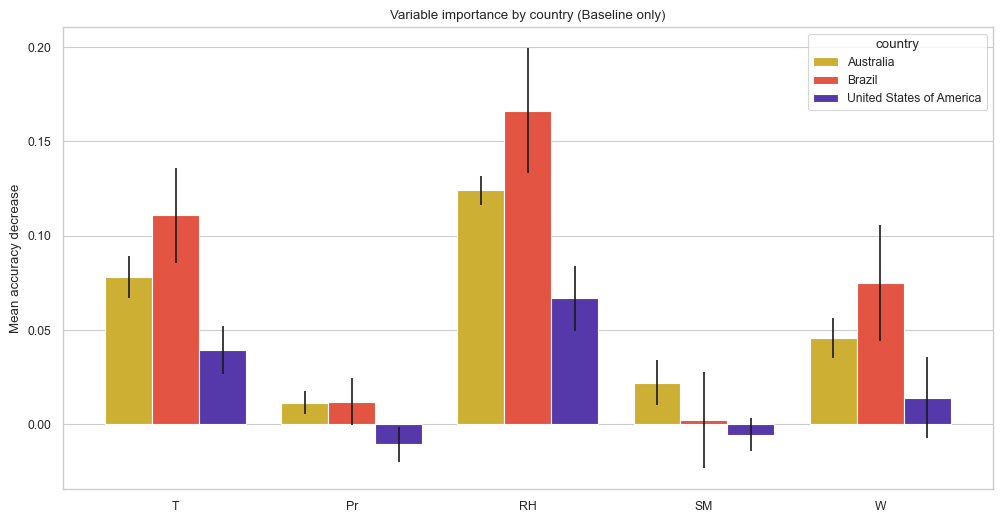

In [34]:
n = len(countries)

fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output.loc[output.gwl == 'Baseline'], x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-n], y=y_coords[:-n], yerr=output.loc[output.gwl == 'Baseline']["importances_std"], fmt="none", c="k")

ax.set_title("Variable importance by country (Baseline only)")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance_{clen}countries_Baseline.png')

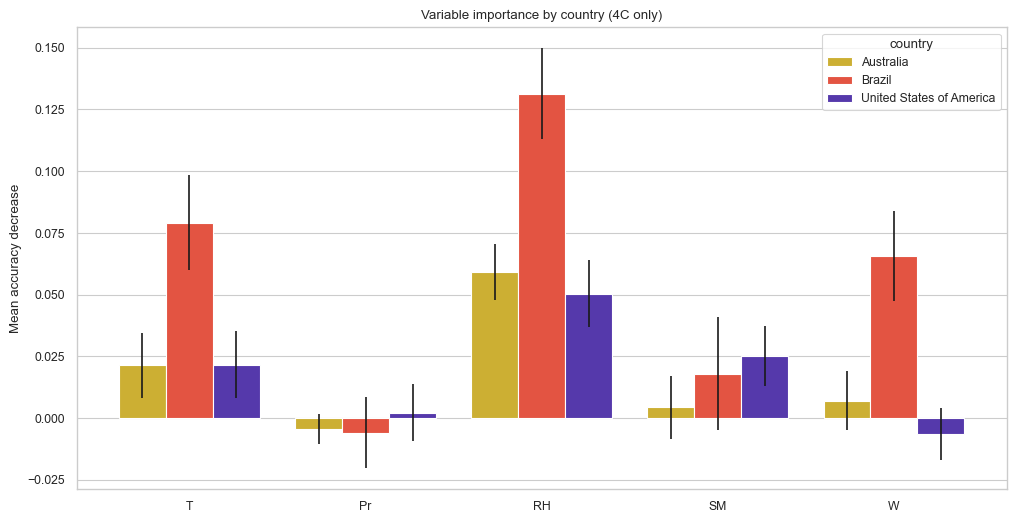

In [35]:
n = len(countries)

fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output.loc[output.gwl == 'GWL4'], x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-n], y=y_coords[:-n], yerr=output.loc[output.gwl == 'GWL4']["importances_std"], fmt="none", c="k")

ax.set_title("Variable importance by country (4C only)")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance_{clen}countries_GWL4.png')

### Is there a difference in variable importance between (12 <= FFDI < 24) and (FFDI >= 24)?

In [36]:
output = []
countries = ['Australia', 'Brazil', 'United States of America']  # 'South Africa', 

for ffdi_class in ['12 <= FFDI < 24', 'FFDI >= 24']:
# for gwl in ['Baseline', "GWL4"]:
    for country in countries:
        # Subset the big dataframe
        # mysample = df_final[df_final.names.isin([country])].sample(frac=0.1, replace=False)
        mysample = df_final[(df_final.names.isin([country])) & (df_final.ffdi_class.isin([ffdi_class]))].sample(frac=0.1, replace=False)
        # mysample['ffdi_class_int'] = 0
        # mysample['ffdi_class_int'].loc[mysample['ffdi_class'] == 'FFDI >= 24'] = 1
    
        # Extract training and test data
        feature_names = ['air_temperature', 'precipitation_in_mpersec', 'relative_humidity', 'soil_moisture_content_top_metre', 'windspeed_in_km_per_hr']
        X_features = mysample[feature_names]
        y_classes = mysample[['FFDI']].astype(int)
        X_train, X_test, y_train, y_test = train_test_split(X_features, y_classes, random_state=42)
    
        # Run the RF classifier
        forest = RandomForestClassifier(random_state=0)
        forest.fit(X_train, y_train)
    
        # Get the variable importance using the test data
        result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
        forest_importances = pd.Series(result.importances_mean, index=feature_names)
    
        # Add into a DataFrame
        if isinstance(output, list):
            output = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country, 'ffdi_class': ffdi_class})
        else:
            newoutput = pd.DataFrame({'importances': forest_importances, 'importances_std': result.importances_std, 'country': country, 'ffdi_class': ffdi_class})
            output = pd.concat([output, newoutput])
    
# Now convert the index into a column
output = output.reset_index(inplace=False).rename(columns={'index': 'Variable'})
# Make columns categorical to help with plotting
output['Variable'] = pd.Categorical(output['Variable'], output['Variable'].unique())
output['country'] = pd.Categorical(output['country'], output['country'].unique())
output['ffdi_class'] = pd.Categorical(output['ffdi_class'], output['ffdi_class'].unique())
# Make variable names nicer for plotting
lookup = {'air_temperature': 'T', 'precipitation_in_mpersec': 'Pr', 'relative_humidity': 'RH', 'soil_moisture_content_top_metre': 'SM', 'windspeed_in_km_per_hr': 'W'}
output['Variable_nice'] = 'T'
for k, v in lookup.items():
    output['Variable_nice'].loc[output['Variable'] == k] = v

output

Variable  importances  importances_std  \
0                   air_temperature     0.096286         0.007763   
1          precipitation_in_mpersec     0.007073         0.005865   
2                 relative_humidity     0.142706         0.007410   
3   soil_moisture_content_top_metre     0.027144         0.008609   
4            windspeed_in_km_per_hr     0.058002         0.009053   
5                   air_temperature     0.101418         0.015769   
6          precipitation_in_mpersec     0.013002         0.010099   
7                 relative_humidity     0.197163         0.014959   
8   soil_moisture_content_top_metre     0.007329         0.014856   
9            windspeed_in_km_per_hr     0.109693         0.008405   
10                  air_temperature     0.116235         0.013606   
11         precipitation_in_mpersec     0.019059         0.012381   
12                relative_humidity     0.152235         0.007141   
13  soil_moisture_content_top_metre     0.049412         0.011479   
14           windspeed_in_km_per_hr     0.063529         0.007366   
15                  air_temperature     0.064527         0.006643   
16         precipitation_in_mpersec     0.006301         0.002164   
17                relative_humidity     0.074446         0.006555   
18  soil_moisture_content_top_metre     0.008751         0.006987   
19           windspeed_in_km_per_hr     0.047841         0.006305   
20                  air_temperature     0.041096         0.019373   
21         precipitation_in_mpersec     0.001370         0.015559   
22                relative_humidity     0.076712         0.025407   
23  soil_moisture_content_top_metre    -0.001370         0.033805   
24           windspeed_in_km_per_hr    -0.002740         0.027940   
25                  air_temperature     0.080268         0.013461   
26         precipitation_in_mpersec     0.007023         0.009513   
27                relative_humidity     0.077592         0.006655   
28  soil_moisture_content_top_metre     0.041806         0.009489   
29           windspeed_in_km_per_hr     0.051839         0.013971   

                     country       ffdi_class Variable_nice  
0                  Australia  12 <= FFDI < 24             T  
1                  Australia  12 <= FFDI < 24            Pr  
2                  Australia  12 <= FFDI < 24            RH  
3                  Australia  12 <= FFDI < 24            SM  
4                  Australia  12 <= FFDI < 24             W  
5                     Brazil  12 <= FFDI < 24             T  
6                     Brazil  12 <= FFDI < 24            Pr  
7                     Brazil  12 <= FFDI < 24            RH  
8                     Brazil  12 <= FFDI < 24            SM  
9                     Brazil  12 <= FFDI < 24             W  
10  United States of America  12 <= FFDI < 24             T  
11  United States of America  12 <= FFDI < 24            Pr  
12  United States of America  12 <= FFDI < 24            RH  
13  United States of America  12 <= FFDI < 24            SM  
14  United States of America  12 <= FFDI < 24             W  
15                 Australia       FFDI >= 24             T  
16                 Australia       FFDI >= 24            Pr  
17                 Australia       FFDI >= 24            RH  
18                 Australia       FFDI >= 24            SM  
19                 Australia       FFDI >= 24             W  
20                    Brazil       FFDI >= 24             T  
21                    Brazil       FFDI >= 24            Pr  
22                    Brazil       FFDI >= 24            RH  
23                    Brazil       FFDI >= 24            SM  
24                    Brazil       FFDI >= 24             W  
25  United States of America       FFDI >= 24             T  
26  United States of America       FFDI >= 24            Pr  
27  United States of America       FFDI >= 24            RH  
28  United States of America       FFDI >= 24            SM  
29  United States of Americ

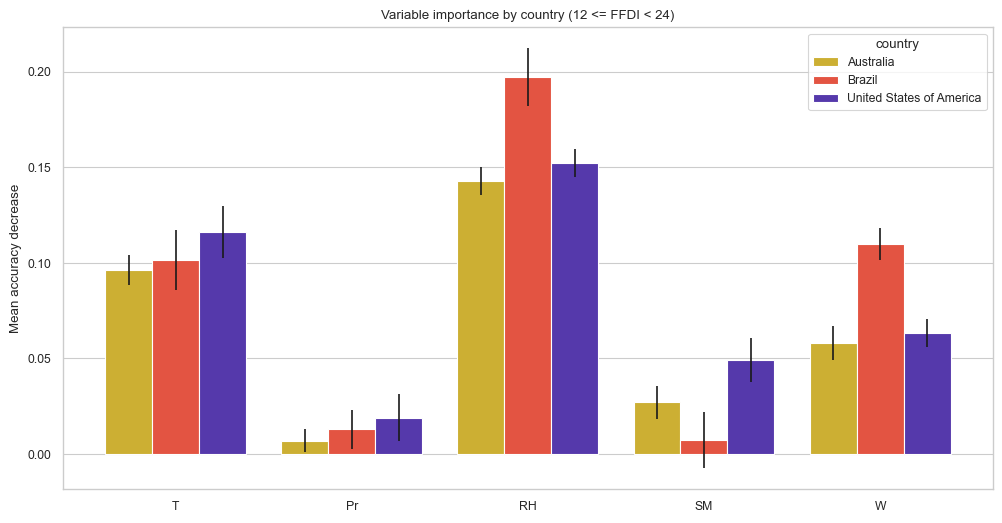

In [37]:
n = len(countries)
# '12 <= FFDI < 24', 'FFDI >= 24'
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output.loc[output.ffdi_class == '12 <= FFDI < 24'], x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-n], y=y_coords[:-n], yerr=output.loc[output.ffdi_class == '12 <= FFDI < 24']["importances_std"], fmt="none", c="k")

ax.set_title("Variable importance by country (12 <= FFDI < 24)")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance_{clen}countries_12FFDI24.png')

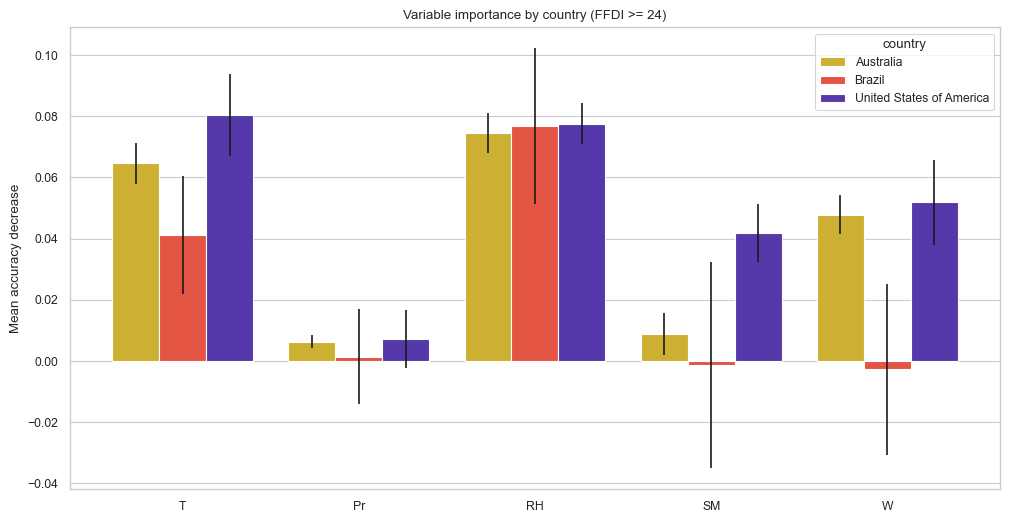

In [38]:
n = len(countries)
# '12 <= FFDI < 24', 'FFDI >= 24'
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(data=output.loc[output.ffdi_class == 'FFDI >= 24'], x='Variable_nice', y='importances', hue='country', palette='CMRmap_r')
# Do something with error bars
# Based on https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot 
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:-n], y=y_coords[:-n], yerr=output.loc[output.ffdi_class == 'FFDI >= 24']["importances_std"], fmt="none", c="k")

ax.set_title("Variable importance by country (FFDI >= 24)")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("")
plt.savefig(f'/net/data/users/hadhy/ESMS/fire_paper/plots/meteorological-drivers_variable_importance_{clen}countries_FFDIgt24.png')